In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score, precision_recall_fscore_support
)
import matplotlib.pyplot as plt
import seaborn as sns
import json
from datetime import datetime

In [2]:
df = pd.read_csv("../data/raw/creditcard.csv")
print(f"Shape: {df.shape}")
print(df.head())

Shape: (284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26 

In [3]:
print(df['Class'].value_counts())
print(df.describe())

Class
0    284315
1       492
Name: count, dtype: int64


                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.175161e-15  3.384974e-16 -1.379537e-15  2.094852e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.021879e-15  1.494498e-15 -5.620335e-16  1.149614e-16 -2.414189e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [4]:
X = df.drop(['Time', 'Class'], axis=1)
y = df['Class']

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42)
}


In [8]:
results = {}

In [9]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    auc = roc_auc_score(y_test, y_proba)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    
    results[name] = {
        "confusion_matrix": cm,
        "classification_report": report,
        "roc_auc": auc,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }
    print(f"\n=== {name} ===")
    print("Confusion Matrix:\n", cm)
    print("AUC:", auc)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1:", f1)
    print("Classification Report:\n", classification_report(y_test, y_pred))


=== LogisticRegression ===
Confusion Matrix:
 [[56851    13]
 [   35    63]]
AUC: 0.9588814845015102
Precision: 0.8289473684210527
Recall: 0.6428571428571429
F1: 0.7241379310344828
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.64      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962


=== RandomForest ===
Confusion Matrix:
 [[56859     5]
 [   17    81]]
AUC: 0.9528106983508091
Precision: 0.9418604651162791
Recall: 0.826530612244898
F1: 0.8804347826086957
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.83      0.88        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56

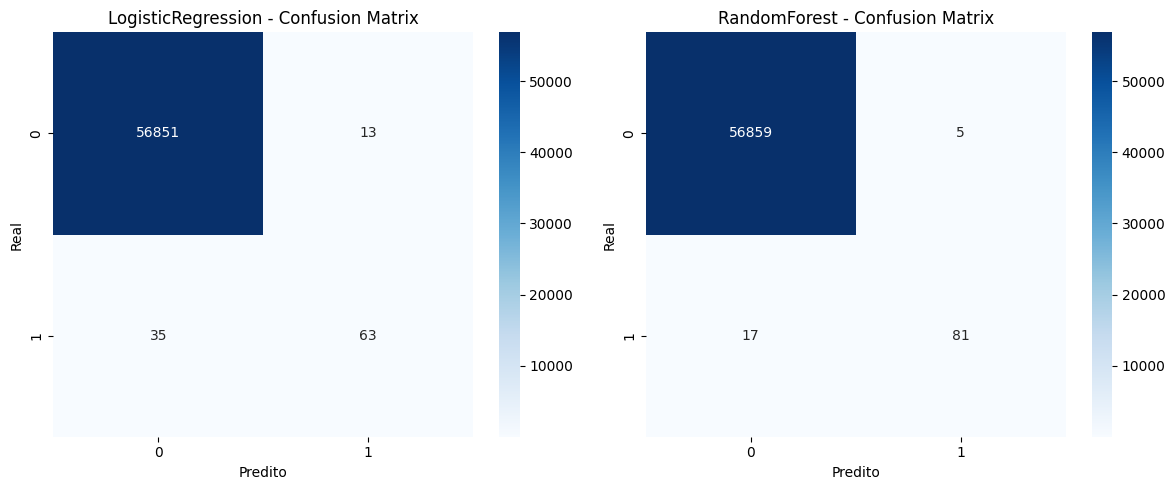

In [10]:
plt.figure(figsize=(12, 5))
for i, (name, res) in enumerate(results.items()):
    plt.subplot(1, 2, i+1)
    sns.heatmap(res["confusion_matrix"], annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predito")
    plt.ylabel("Real")
plt.tight_layout()
plt.show()

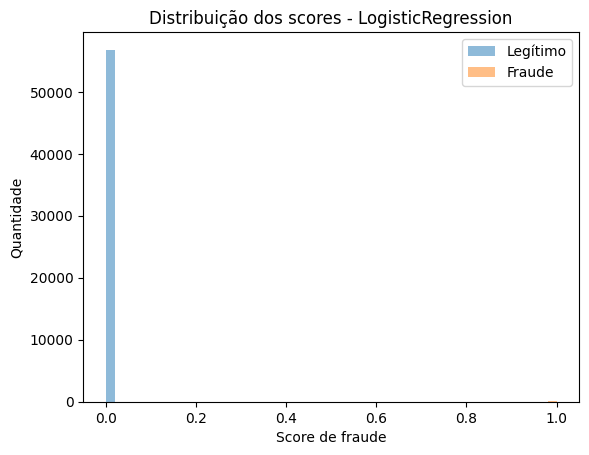

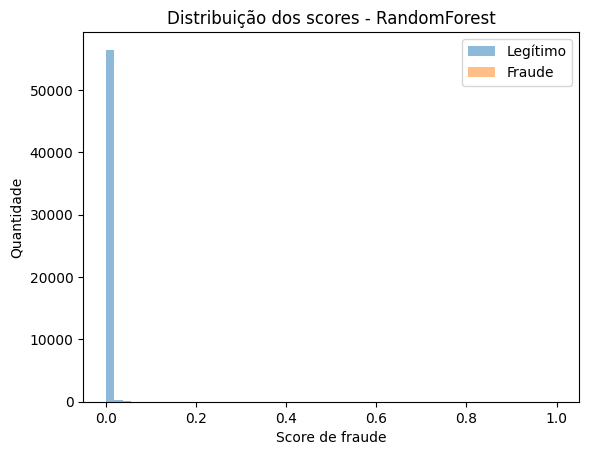

In [11]:
for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    plt.hist(y_proba[y_test == 0], bins=50, alpha=0.5, label="Legítimo")
    plt.hist(y_proba[y_test == 1], bins=50, alpha=0.5, label="Fraude")
    plt.title(f"Distribuição dos scores - {name}")
    plt.xlabel("Score de fraude")
    plt.ylabel("Quantidade")
    plt.legend()
    plt.show()

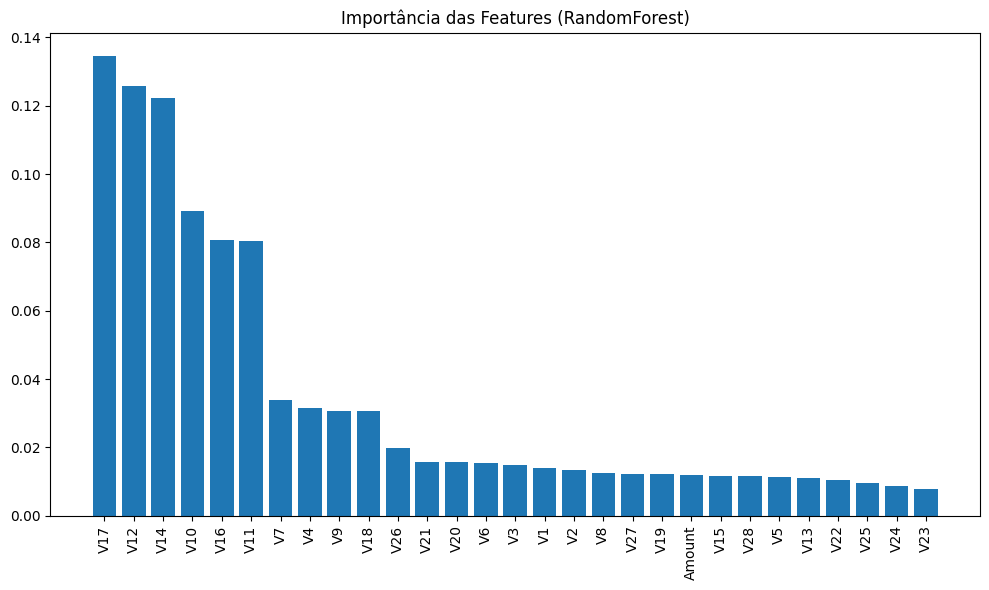

In [12]:
rf = models["RandomForest"]
importances = rf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Importância das Features (RandomForest)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()

In [13]:
# Save metrics computed on the full dataset (usando X_scaled e y)
models_summary = {}
total_cases = int(len(y))
true_fraud = int(y.sum())
for name, model in models.items():
    # predict on full dataset
    y_pred_full = model.predict(X_scaled)
    cm = confusion_matrix(y, y_pred_full)
    if cm.size == 4:
        tn, fp, fn, tp = cm.ravel()
    else:
        tn = fp = fn = tp = 0
    predicted_fraud = int(y_pred_full.sum())
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    models_summary[name] = {
        "model": name,
        "predicted_fraud": predicted_fraud,
        "tp": int(tp),
        "fp": int(fp),
        "fn": int(fn),
        "tn": int(tn),
        "precision": float(precision),
        "recall": float(recall)
    }
out = {
    "timestamp": datetime.utcnow().isoformat(),
    "total_cases": total_cases,
    "true_fraud": true_fraud,
    "models": models_summary
}
with open("../data/processed/full_test_metrics.json", "w") as f:
    json.dump(out, f, indent=2)
# Also write audit_kpis.csv (one row por modelo) for frontend convenience
import csv
with open("../data/processed/audit_kpis.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["model","total_cases","predicted_fraud","true_fraud","tp","fp","fn","tn","precision","recall"])
    for name, m in models_summary.items():
        writer.writerow([
            name,
            out["total_cases"],
            m["predicted_fraud"],
            out["true_fraud"],
            m["tp"],
            m["fp"],
            m["fn"],
            m["tn"],
            m["precision"],
            m["recall"]
        ])

C:\Users\eduardo.vizicato\AppData\Local\Temp\ipykernel_17112\3931362312.py:27: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  "timestamp": datetime.utcnow().isoformat(),
